# 2 Hands On: Data Quality and Pre-Processing

## 1. Assessing Data Quality
Load the following packages: dplyr, na.tools, tidyimpute (version from github decisionpatterns/tidyimpute”)

In [14]:
library("dplyr")
library("na.tools")
library(devtools)
install_github( "decisionpatterns/tidyimpute")
library("tidyimpute")

Skipping install of 'tidyimpute' from a github remote, the SHA1 (9e07748f) has not changed since last install.
  Use `force = TRUE` to force installation



Load the carInsurance data set about the insurance risk rating of cars based on several characteristics of each car

In [15]:
data <- read.csv('../data/02_dataqa/imports-85.data', header=FALSE)

data[data == "?"] <- NA

carInsurance <- data.frame(data)

# List of names obtained of webpage
header <- c("symboling","normalizedLosses","make","fuelType","aspiration","nDoors","bodyStyle","driveWheels","engineLocation","wheelBase","length","width","height","curbWeight","engineType","nCylinders","engineSize","fuelSystem","bore","stroke","compression-ratio","horsepower","peakRpm","cityMpg","highwayMpg","price")

# Assign header a names of df
names(carInsurance) <- header

head(carInsurance,10)

,symboling,normalizedLosses,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compression-ratio,horsepower,peakRpm,cityMpg,highwayMpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,NA,audi,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875


(a) Check if there are any missing values.

In [60]:
print("Variables which contains missing values")

colnames(carInsurance)[colSums(is.na(carInsurance)) > 0]

anyNA(carInsurance)

[1] "Variables which contains missing values"


[1] "V2"  "V6"  "V19" "V20" "V22" "V23" "V26"

[1] TRUE

(b) Count the number of cases that have, at least, one missing value.

In [62]:
carInsurance %>% filter_any_na() %>% count()

n
<int>
159


(c) Create a new data set by removing all the cases that have missing values

In [64]:
newData <- drop_rows_any_na(carInsurance)

head(newData,10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
7,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
9,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
11,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
12,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
13,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
14,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
19,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,⋯,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151


(d) Create a new data set by imputing all the missing values with 0.
- Tip: explore the variants of the function impute()

In [96]:
newCarInsurance <- carInsurance %>% impute_zero_all()

head(newCarInsurance,10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,2,0,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,0,audi,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875


(e) Create a new data set by imputing the mean in all the columns which have double type values.

In [161]:
carInsurance %>% 
    select_if(is.double) %>%
    names()

carInsuranceMean <- carInsurance %>% 
   mutate_if(is.double, mean)

head(carInsuranceMean, 10)


[1] "V10" "V11" "V12" "V13" "V21"

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,98.75659,⋯,130,mpfi,3.47,2.68,10.14254,111,5000,21,27,13495
2,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,98.75659,⋯,130,mpfi,3.47,2.68,10.14254,111,5000,21,27,16500
3,1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,98.75659,⋯,152,mpfi,2.68,3.47,10.14254,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,98.75659,⋯,109,mpfi,3.19,3.40,10.14254,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,98.75659,⋯,136,mpfi,3.19,3.40,10.14254,115,5500,18,22,17450
6,2,NA,audi,gas,std,two,sedan,fwd,front,98.75659,⋯,136,mpfi,3.19,3.40,10.14254,110,5500,19,25,15250
7,1,158,audi,gas,std,four,sedan,fwd,front,98.75659,⋯,136,mpfi,3.19,3.40,10.14254,110,5500,19,25,17710
8,1,NA,audi,gas,std,four,wagon,fwd,front,98.75659,⋯,136,mpfi,3.19,3.40,10.14254,110,5500,19,25,18920
9,1,158,audi,gas,turbo,four,sedan,fwd,front,98.75659,⋯,131,mpfi,3.13,3.40,10.14254,140,5500,17,20,23875


(f) Create a new data set by imputing the mode in all the columns which have integer type values.

In [172]:
colsCars <- carInsurance %>% 
    select_if(is.integer) %>%
    names()

# Calculate mode
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

carInsuranceMode <- carInsurance %>% 
   mutate_if(is.integer, getmode)

carInsuranceMode %>%
   select(all_of(colsCars)) 

V1,V14,V17,V24,V25
<int>,<int>,<int>,<int>,<int>
0,2385,122,31,25
0,2385,122,31,25
0,2385,122,31,25
0,2385,122,31,25
0,2385,122,31,25
0,2385,122,31,25
0,2385,122,31,25
0,2385,122,31,25
0,2385,122,31,25


(g) Create a new data set by imputing the most frequent value to the column ”nDoors”.
- Tip: use the function impute_replace()

In [195]:
fv <- names(which.max(table(carInsurance$nDoors)))

carInsurance[c("nDoors")] %>% impute_replace_all(., fv)

nDoors
<chr>
two
two
two
four
four
two
four
four
four


(h) Combine the three last imputations to obtain a final dataset. Are there any duplicated cases?
- Tip: use the functions distinct() and count()

In [ ]:
carInsurance %>% impute(.na = na.mode, .predicate = is.double())

# 2. Data Pre-Processing

## 2. Load the package dlookr. Use the same car insurance data set above and apply the following transformations to the price attribute. Be critical regarding the obtained results.


In [37]:
library("dlookr")


Attaching package: 'dlookr'


The following object is masked from 'package:base':

    transform




(a) Apply range-based normalization and z-score normalization.
- Tip: use the function transform().

In [57]:
class(carInsurance$price) = "double"
rangeNorm <- transform(carInsurance$price, method = "minmax")

carInsurance %>%
   mutate(rangeNorm = transform(carInsurance$price, method = "minmax"),
   zScoreNorm = transform(carInsurance$price, method = "minmax")) %>%
   select(rangeNorm, zScoreNorm) 

rangeNorm,zScoreNorm
<transfrm>,<transfrm>
0.2079588898,0.2079588898
0.2825579663,0.2825579663
0.2825579663,0.2825579663
0.2192542575,0.2192542575
0.3061417010,0.3061417010
0.2515267365,0.2515267365
0.3125961968,0.3125961968
0.3426344273,0.3426344273
0.4656422223,0.4656422223


(b) Discretize it into 4 equal-frequency ranges an into 4 equal-width ranges.
- Tip: use the function binning().

In [54]:

bin <- binning(carInsurance[!is.na("price"),c("price")], nbins = 4, type = "equal")
extract(bin)

[1] [5118,15188.5]  (15188.5,25259] (15188.5,25259] [5118,15188.5] 
  [5] (15188.5,25259] (15188.5,25259] (15188.5,25259] (15188.5,25259]
  [9] (15188.5,25259] <NA>            (15188.5,25259] (15188.5,25259]
 [13] (15188.5,25259] (15188.5,25259] (15188.5,25259] (25259,35329.5]
 [17] (35329.5,45400] (35329.5,45400] [5118,15188.5]  [5118,15188.5] 
 [21] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
 [25] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
 [29] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
 [33] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
 [37] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
 [41] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
 [45] <NA>            <NA>            [5118,15188.5]  (25259,35329.5]
 [49] (35329.5,45400] (35329.5,45400] [5118,15188.5]  [5118,15188.5] 
 [53] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
 [57] [5118,15188.5]  [5118,15188.5]  (15188.5,25259] [5118,15188.5] 
 [61] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
 [65] [5118,15188.5]  (15188.5,25259] (15188.5,25259] (25259,35329.5]
 [69] (25259,35329.5] (25259,35329.5] (25259,35329.5] (25259,35329.5]
 [73] (25259,35329.5] (35329.5,45400] (35329.5,45400] (15188.5,25259]
 [77] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
 [81] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
 [85] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
 [89] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
 [93] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
 [97] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[101] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[105] (15188.5,25259] (15188.5,25259] (15188.5,25259] [5118,15188.5] 
[109] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  (15188.5,25259]
[113] (15188.5,25259] (15188.5,25259] (15188.5,25259] (15188.5,25259]
[117] (15188.5,25259] (15188.5,25259] [5118,15188.5]  [5118,15188.5] 
[121] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[125] [5118,15188.5]  (15188.5,25259] (25259,35329.5] (25259,35329.5]
[129] (35329.5,45400] <NA>            [5118,15188.5]  [5118,15188.5] 
[133] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  (15188.5,25259]
[137] (15188.5,25259] (15188.5,25259] [5118,15188.5]  [5118,15188.5] 
[141] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[145] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[149] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[153] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[157] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[161] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[165] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[169] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[173] (15188.5,25259] [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[177] [5118,15188.5]  [5118,15188.5]  (15188.5,25259] (15188.5,25259]
[181] (15188.5,25259] (15188.5,25259] [5118,15188.5]  [5118,15188.5] 
[185] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[189] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[193] [5118,15188.5]  [5118,15188.5]  [5118,15188.5]  [5118,15188.5] 
[197] (15188.5,25259] (15188.5,25259] (15188.5,25259] (15188.5,25259]
[201] (15188.5,25259] (15188.5,25259] (15188.5,25259] (15188.5,25259]
[205] (15188.5,25259]
4 Levels: [5118,15188.5] < (15188.5,25259] < ... < (35329.5,45400]

## 3. With the seed 111019 obtain the following samples on the car insurance data set.
- Tip: use the function sample_frac().


(a) A random sample of 60% of the cases, with replacement

(b) A stratified sample of 60% of the cases of cars, according to the fuelType attribute.

(c) Use the table() function to inspect the distribution of values in each of the two samples above.

## 4. Load the package corrplot and select the numeric attributes of the car insurance data set.

In [58]:
library("corrplot")

corrplot 0.92 loaded



(a) Using the function cor(), obtain the pearson correlation coefficient between each pair of variables.

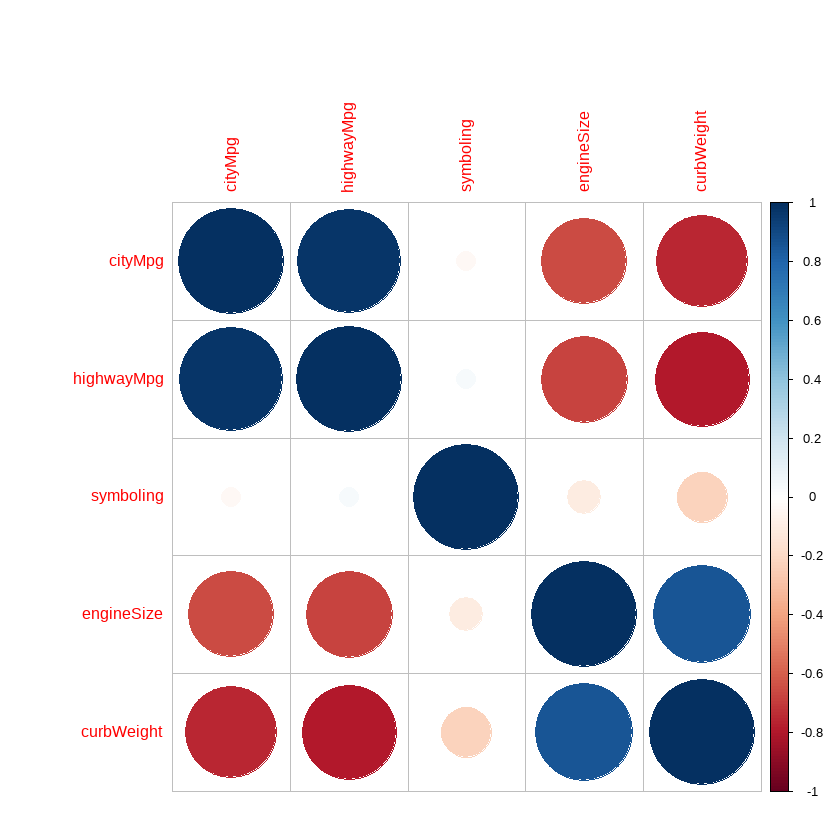

In [66]:
intCars <- carInsurance %>% 
    select_if(is.integer)

colint <- carInsurance %>% 
    select_if(is.integer) %>%
    names()

M <- cor(intCars)

corrplot(M, order = 'AOE')


(b) Apply the function cor.mtest() to the previous result to calculate the p-values and confidence intervals of the correlation coefficient for each pair of variables.

Warning message in corrplot(M, p.mat = testRes$p, sig.level = 0.1, order = "hclust", :
"p.mat and corr may be not paired, their rownames and colnames are not totally same!"


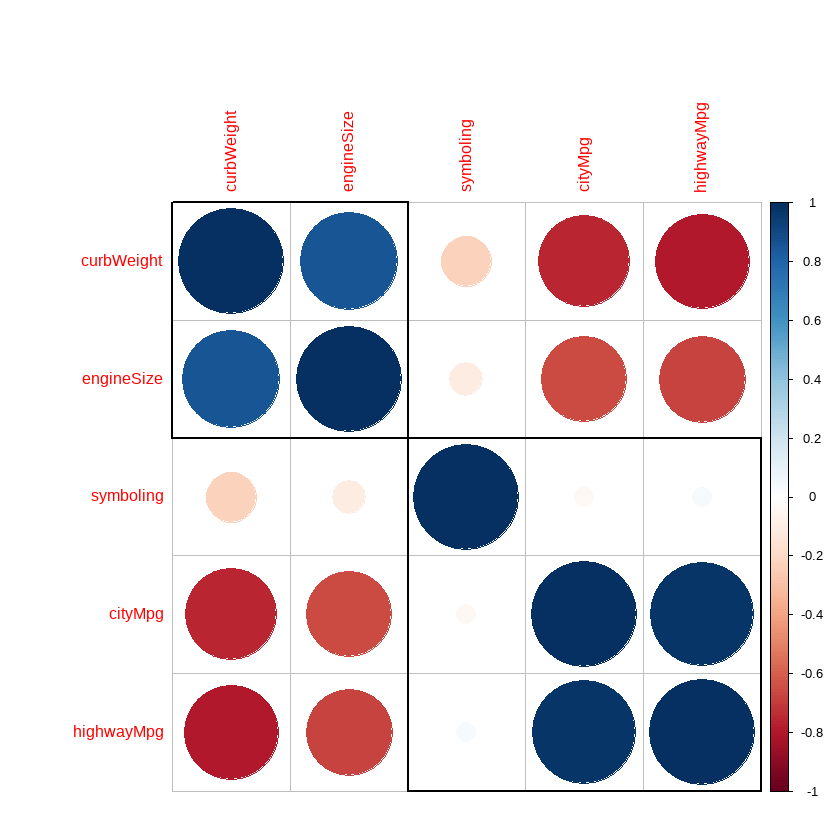

In [68]:
testRes = cor.mtest(mtcars, conf.level = 0.95)

## specialized the insignificant value according to the significant level
corrplot(M, p.mat = testRes$p, sig.level = 0.10,
         addCoef.col ='black', order = 'hclust', addrect = 2)

(c) Plot the all correlation information using the function corrplot. Explore some of its parameters

## 5. Load the data set USJudgeRatings, from the datasets package, containing lawyers’ ratings of state judges in the US Superior Court regarding a set of attributes.


(a) Apply the function prcomp() to obtain the principal components. Inspect how each variable is obtained by the linear combination of each component.

(b) Load the package ggbiplot and plot the two first components with the function ggbiplot(). You can label each point with the lawyer’s name by setting the labels parameter.